## Preprocessing. Read data file 'charity_data.csv', and create dataframe 'application_df'

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Output characteristics and properties of dataframe.

In [32]:
application_df.shape

(34299, 12)

In [33]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


### The Dataframe has 12 Columns. They comprise the Target for th emodel "IS_SUCCESSFUL", while the other 11variables are potential Features for the model.

In [34]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

# Confirm fields have been dropped.
# application_df.info()

### Confirmed that the fields 'EIN' and 'NAME' have been dropped. Now 9 Variables as lists are Features for the model.

## Determine the number of Unique values in each column.

In [35]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
# print(unique_values)

## ## Determine the number of data points for each unique value for columns with more that 10 unique values, in this case APPLICATION_TYPE.

In [36]:
# Look at APPLICATION_TYPE value counts for binning
# Get value counts for the 'APPLICATION_TYPE' column
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Print the value counts
# print(application_type_counts)

## Selected 250 as the cut off point for APPLICATION_TYPES. All counts below 250 are binned as 'other'

In [37]:
# Get value counts for the 'APPLICATION_TYPE' column
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Choose a cutoff value to determine which types to replace
cutoff = 500

# Create a list of application types to be replaced (those below the cutoff)
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index.tolist()

# Print the list of application types to replace
# print(application_types_to_replace)

In [38]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
# application_df['APPLICATION_TYPE'].value_counts()

### Binning is successful

## Selected 1000 as the cut off point for CLASSIFICATION. First counted the numbers of each classification, then removed those with a classification, then binned those below 1000 as 'other'. 

In [39]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Print the value counts
# print(classification_counts)

In [40]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_greater_than_one = classification_counts[classification_counts > 1]

# Print the filtered classifications and their counts
# print(classifications_greater_than_one)

In [41]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff = 1000

# Create a list of classifications to be replaced (those below the cutoff)
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
# application_df['CLASSIFICATION'].value_counts()

### Encode Categorical variables using pd.get_dummies()

In [42]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_numeric = pd.get_dummies(application_df)

# Print the first first of the new DataFrame to verify the transformation
# print(application_df_numeric.head(5))

## Split this prepoccessed data into a Target array (IS_SUCCESSFUL), and Features array.

In [43]:
# Extract the target variable into its own array
y = application_df_numeric['IS_SUCCESSFUL'].values

# Drop the target column from the DataFrame and use the rest as the features array
X = application_df_numeric.drop(['IS_SUCCESSFUL'], axis=1).values

# Print the shapes of X and y to confirm the split
print("Shape of Features Matrix:", X.shape)
print("Shape of Target Array:", y.shape)

Shape of Features Matrix: (34299, 43)
Shape of Target Array: (34299,)


### Split the data set into train and test

In [44]:
# Split the data set into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train/test datasets to verify the split
print("Training set shape (features):", X_train.shape)
print("Test set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Test set shape (target):", y_test.shape)


Training set shape (features): (27439, 43)
Test set shape (features): (6860, 43)
Training set shape (target): (27439,)
Test set shape (target): (6860,)


## Create a StandardScaler instances

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Convert X_train and y_train to float32 if they are not already
X_train_scaled = X_train_scaled.astype('float32')
y_train = y_train.astype('float32')

## Compare Neural Network and PCA Models

### Neural Network Model

In [46]:
# Define the neural network model
def create_model(input_dim):
    model = tf.keras.models.Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    return model    
        

In [47]:
# Original data model
nn_original = create_model(X_train_scaled.shape[1])
nn_original.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# nn_original.summary()

C:\Users\jerry\anaconda1\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Train the original model
history_original = nn_original.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6969 - loss: 0.5917 - val_accuracy: 0.7360 - val_loss: 0.5532
Epoch 2/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7302 - loss: 0.5557 - val_accuracy: 0.7349 - val_loss: 0.5523
Epoch 3/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7246 - loss: 0.5580 - val_accuracy: 0.7351 - val_loss: 0.5521
Epoch 4/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7266 - loss: 0.5559 - val_accuracy: 0.7392 - val_loss: 0.5451
Epoch 5/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7305 - loss: 0.5499 - val_accuracy: 0.7367 - val_loss: 0.5465
Epoch 6/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7306 - loss: 0.5502 - val_accuracy: 0.7362 - val_loss: 0.5523
Epoch 7/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7287 - loss: 0.5520 - val_accuracy: 0.7376 - val_loss: 0.5466
Epoch 8/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7279 - loss: 0.5510 - 

### Final Metrics 4 Layer Neural Networks Model

In [49]:
# Print out the final metrics
history_dict = history_original.history

# Retrieve the final metrics from the last epoch
final_train_loss = history_dict['loss'][-1]
final_train_accuracy = history_dict['accuracy'][-1]
final_validation_loss = history_dict['val_loss'][-1]
final_validation_accuracy = history_dict['val_accuracy'][-1]

# Print out the final metrics
print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final training accuracy: {final_train_accuracy:.4f}")
print(f"Final validation loss: {final_validation_loss:.4f}")
print(f"Final validation accuracy: {final_validation_accuracy:.4f}")

Final training loss: 0.5377
Final training accuracy: 0.7356
Final validation loss: 0.5480
Final validation accuracy: 0.7394


### PCA Model

In [50]:
from sklearn.decomposition import PCA
# Applying PCA
pca = PCA(n_components=0.95)  # retains 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [51]:
# PCA data model
nn_pca = create_model(X_train_pca.shape[1])
nn_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# nn_pca.summary()

C:\Users\jerry\anaconda1\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Train the PCA model
history_pca = nn_pca.fit(X_train_pca, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7086 - loss: 0.5837 - val_accuracy: 0.7398 - val_loss: 0.5537
Epoch 2/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7196 - loss: 0.5627 - val_accuracy: 0.7369 - val_loss: 0.5518
Epoch 3/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7252 - loss: 0.5582 - val_accuracy: 0.7349 - val_loss: 0.5485
Epoch 4/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7321 - loss: 0.5543 - val_accuracy: 0.7402 - val_loss: 0.5487
Epoch 5/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7289 - loss: 0.5514 - val_accuracy: 0.7383 - val_loss: 0.5518
Epoch 6/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7283 - loss: 0.5564 - val_accuracy: 0.7309 - val_loss: 0.5500
Epoch 7/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7341 - loss: 0.5451 - val_accuracy: 0.7403 - val_loss: 0.5492
Epoch 8/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7328 - loss: 0.5469 - 

### Final Metrics PCA Model

In [53]:
# Print out the final metrics
history_dict = history_pca.history

# Retrieve the final metrics from the last epoch
final_train_loss = history_dict['loss'][-1]
final_train_accuracy = history_dict['accuracy'][-1]
final_validation_loss = history_dict['val_loss'][-1]
final_validation_accuracy = history_dict['val_accuracy'][-1]

# Print out the final metrics
print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final training accuracy: {final_train_accuracy:.4f}")
print(f"Final validation loss: {final_validation_loss:.4f}")
print(f"Final validation accuracy: {final_validation_accuracy:.4f}")

Final training loss: 0.5399
Final training accuracy: 0.7361
Final validation loss: 0.5475
Final validation accuracy: 0.7372


### Plot NN and PCA Model History

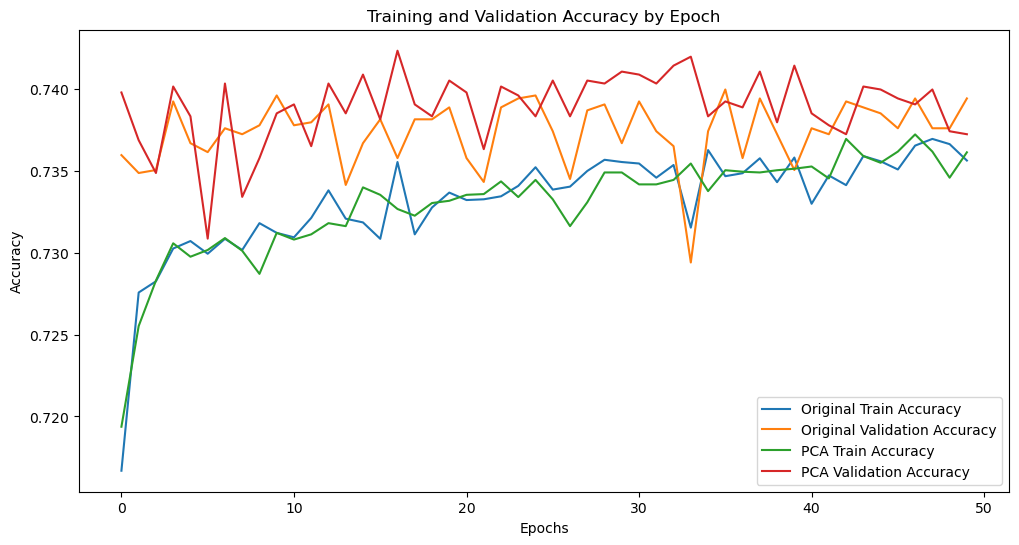

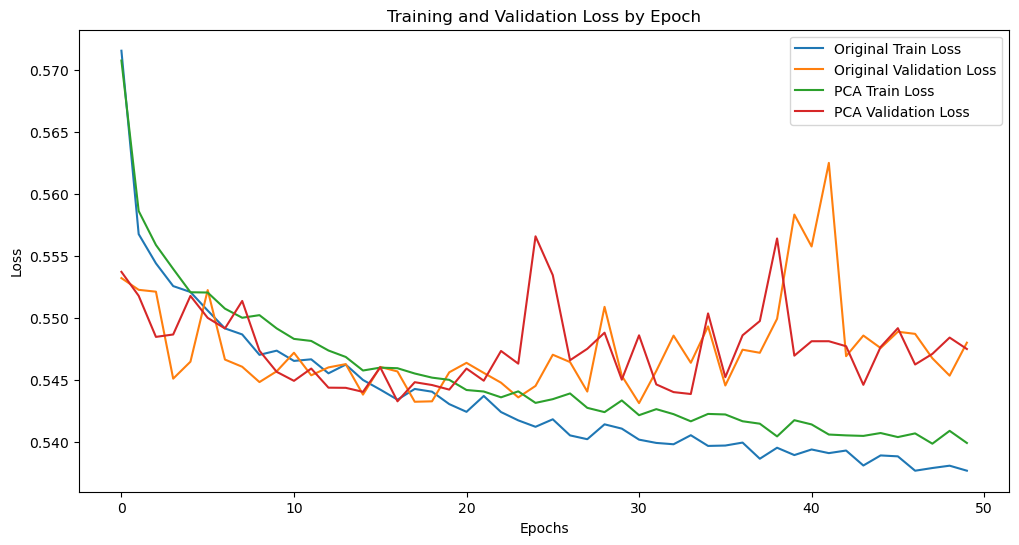

In [54]:
def plot_model_history(original_history, pca_history, metric='accuracy'):
    """ Plots comparison of a metric between the original and PCA model histories. """
    plt.figure(figsize=(12, 6))
    
    # Plot original model history
    plt.plot(original_history.history[metric], label=f'Original Train {metric.capitalize()}')
    plt.plot(original_history.history['val_' + metric], label=f'Original Validation {metric.capitalize()}')
    
    # Plot PCA model history
    plt.plot(pca_history.history[metric], label=f'PCA Train {metric.capitalize()}')
    plt.plot(pca_history.history['val_' + metric], label=f'PCA Validation {metric.capitalize()}')
    
    # Titles and labels
    plt.title(f'Training and Validation {metric.capitalize()} by Epoch')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    
    plt.show()

# Plot accuracy
plot_model_history(history_original, history_pca, 'accuracy')

# Plot loss
plot_model_history(history_original, history_pca, 'loss')


## Export Model as HDF5 File

In [55]:
# Export our model to HDF5 file
from tensorflow.keras.models import load_model

# Load the model from the file
nn_pca.save('AlphabetSoup_pca.Charity.h5')